Please verify that the potential has radial dependence close to 
2*G*
μ
*ln(r)+constant. Where 
μ
is its mass per unit length and r is the 
distance to the line mass. 

In [2]:
import numpy as np
# set the boundary values, let r=50 has 0 potential
xxx = np.linspace(-50,51,101)
rbound = np.sqrt(np.power(xxx,2) + np.power(50,2) )
Vbound = 2*np.log(rbound/50.) 

Initializing
Working hard, wait for the figure while I count to 60
0
3.76987870701442
1.911674298402245
1.271721012993638
0.9045181131902024
0.6473922553054161
0.48100451497874563
0.374750581357126
0.2975816284902242
0.2375051965767137
0.20171016307657325
10
0.17187375026088958
0.1453297411564192
0.12315406583132915
0.1047847234520779
0.08941651149861254
0.07638626707775567
0.06715138770627871
0.05895111868587233
0.053505729817989955
0.047437044063841305
20
0.042262796084221343
0.03756785229262255
0.03376697313833399
0.031385857743360335
0.02858591671547206
0.02626204680455063
0.02407052197341908
0.022844263094501827
0.02164292189843242
0.020640316702207784
30
0.019856835091930147
0.0188925528762105
0.01835485264698944
0.017584860567019023
0.01707694537350468
0.016465795840577835
0.01597656003395498
0.015470737872183005
0.01501803474567387
0.014591829887719676
40
0.01417267142553369
0.013802964560701625
0.013421396606266178
0.01309428440532212
0.012748952762734245
0.01245418104160434
0

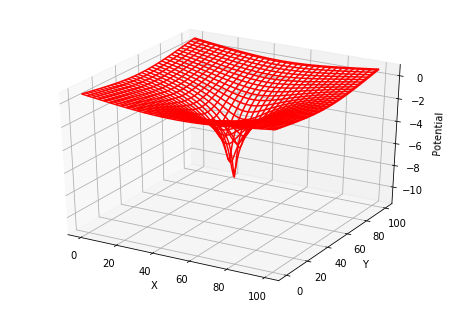

In [3]:
%matplotlib inline
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit
# 9 point stencil


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 101; Niter = 2000; V = zeros((Nmax, Nmax), float)  
h = 101. / (Nmax) # set dx = dy = 1.
G = 1. # 
#rho = 1.

print ("Working hard, wait for the figure while I count to 60")
#for k in range(0, Nmax-1):  V[k,0] = 100.0              # Line at 100V

V[:,0] = V[:,-1] = V[0,:] = V[-1,:]  = Vbound

for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1):
            if (i,j) == (50,50):
                rho = 1.   # only if (x,y) = (50, 50), the density is equal to 1.
            else:
                rho = 0.
                
            du = 1./20.*(V[i-1,j+1]+V[i+1,j+1]+V[i-1,j-1]+V[i+1,j-1]+4.*(V[i,j+1]+V[i,j-1]+V[i-1,j]+V[i+1,j]))\
            -6.*h**2*(4.*numpy.pi*G*rho)/20.  -V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j] + omega*du 
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

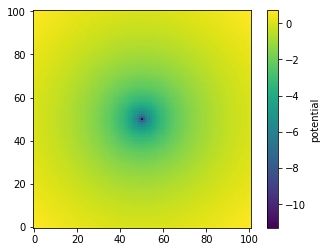

In [4]:
# the potential result
p.imshow(Z, origin='lower')
p.colorbar().set_label('potential')

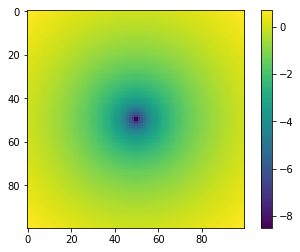

In [5]:
# What it should be from the analytical solution
xx = np.linspace(-50,50,100)
X, Y = np.meshgrid(xx, xx)
R = np.sqrt(X**2+Y**2)
p.imshow(2*np.log(R/50.)) 
p.colorbar()

In [6]:
# Caculate the r inferred from the potencial caculated
R_inferred = np.exp( (Z+2.*np.log(50.))/2. )

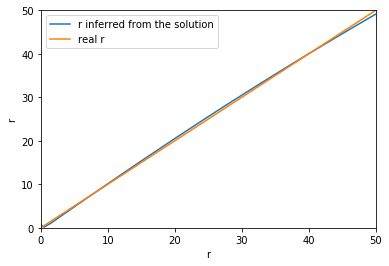

In [10]:
# They are very close
p.plot(xxx, R_inferred[50,:], label='r inferred from the solution')
p.plot(xx, xx, label='real r')
p.xlabel('r')
p.ylabel('r')
p.xlim(0,50)
p.ylim(0,50)
p.legend()